In [ ]:
# 1. Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [ ]:
# 2. Loading Dataset
df = pd.read_csv('cyberbullying_tweets.csv')
print(df.head())

                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [ ]:
# 3. Data Summary
print(df.describe(include='all'))
print(f"Number of samples: {df.shape[0]}")
print(df['cyberbullying_type'].value_counts())

                      tweet_text cyberbullying_type
count                      47692              47692
unique                     46017                  6
top     MARINATED IN GATER TEARS           religion
freq                           2               7998
Number of samples: 47692
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


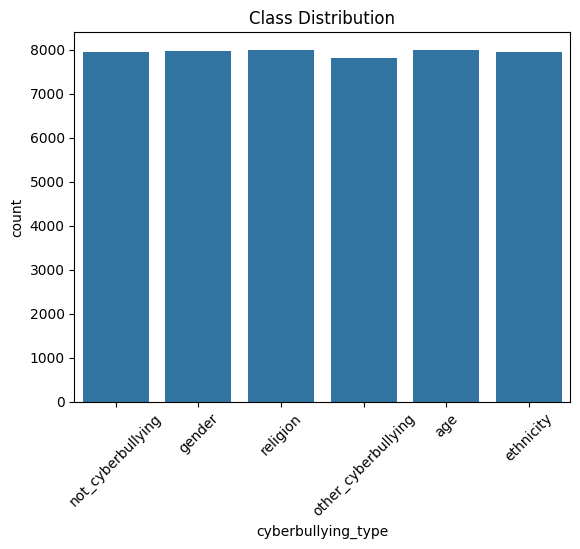

In [ ]:
# 4. Data Visualization
sns.countplot(data=df, x='cyberbullying_type')
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 5. Data Preprocessing
# Handle missing values
df.dropna(subset=['tweet_text', 'cyberbullying_type'], inplace=True)

In [ ]:
# 6. Split the Dataset
X = df['tweet_text']
y = df['cyberbullying_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# We'll use TF-IDF for text vectorization and Logistic Regression for classification
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
model = LogisticRegression(max_iter=1000, random_state=42)


In [22]:
# 8. Training the Model
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluation
y_pred = model.predict(X_test_tfidf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model and vectorizer
joblib.dump(model, 'cyberbullying_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


[[1562    1    4   21   13    2]
 [   2 1548    5   14   30    4]
 [   1    5 1261  147  113    4]
 [  48    7   56  953  505   55]
 [   6   12   65  390 1125   14]
 [   2    2    9   59   13 1481]]
                     precision    recall  f1-score   support

                age       0.96      0.97      0.97      1603
          ethnicity       0.98      0.97      0.97      1603
             gender       0.90      0.82      0.86      1531
  not_cyberbullying       0.60      0.59      0.59      1624
other_cyberbullying       0.63      0.70      0.66      1612
           religion       0.95      0.95      0.95      1566

           accuracy                           0.83      9539
          macro avg       0.84      0.83      0.83      9539
       weighted avg       0.84      0.83      0.83      9539



['vectorizer.pkl']

In [25]:
# 9. Inferencing
# Load model and vectorizer
model = joblib.load('cyberbullying_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Example unseen data
new_tweets = ["You're such a loser!", "Let's hang out today!"]
new_tfidf = vectorizer.transform(new_tweets)

# Predict
predictions = model.predict(new_tfidf)
for tweet, label in zip(new_tweets, predictions):
    print(f"Tweet: {tweet} => Prediction: {label}")

Tweet: You're such a loser! => Prediction: other_cyberbullying
Tweet: Let's hang out today! => Prediction: not_cyberbullying
